In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("Live.csv")
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [4]:
df.drop(['status_id' , 'status_published', 'Column1' , 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [22]:
X= df
#X= df.drop(['status_type'], axis=1)
y= df['status_type']
X

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


In [26]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le= LabelEncoder()
X['status_type']= le.fit_transform(X['status_type'])
y= le.transform(y)

In [27]:
sc= StandardScaler()
sc.fit_transform(X)

array([[ 1.37428794,  0.64610394,  0.32335035, ...,  0.07671305,
         0.47357035, -0.15574803],
       [-0.74810636, -0.17319166, -0.25220622, ..., -0.17600986,
        -0.152587  , -0.15574803],
       [ 1.37428794, -0.00673846,  0.01308938, ...,  0.07671305,
        -0.152587  , -0.15574803],
       ...,
       [-0.74810636, -0.49312768, -0.25220622, ..., -0.17600986,
        -0.152587  , -0.15574803],
       [-0.74810636,  0.26131603, -0.23871662, ..., -0.17600986,
        -0.152587  , -0.15574803],
       [-0.74810636, -0.46070173, -0.25220622, ..., -0.17600986,
        -0.152587  , -0.15574803]])

In [28]:
from sklearn.decomposition import PCA

# Apply PCA to reduce data to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [39]:
from sklearn.cluster import KMeans

km= KMeans(n_clusters= 7, random_state=0)
km.fit(X)

C:\Users\HRISHITA\anaconda3\envs\TF\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=7, random_state=0)

In [40]:
labels = km.fit_predict(X)

C:\Users\HRISHITA\anaconda3\envs\TF\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [41]:
km.inertia_

923410853.9497421

In [32]:
y_pred= km.predict(X)

In [33]:
from sklearn.metrics import adjusted_rand_score

arc= adjusted_rand_score(y, y_pred)
print(arc)

0.13764143296190165


In [34]:
wcss= []

for i in range(1, 21):
    kmeans= KMeans(n_clusters= i, init= "k-means++", random_state= 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

wcss

C:\Users\HRISHITA\anaconda3\envs\TF\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HRISHITA\anaconda3\envs\TF\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HRISHITA\anaconda3\envs\TF\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HRISHITA\anaconda3\envs\TF\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

[8645692195.266678,
 4986397875.914598,
 2735263885.7707624,
 2002154042.557056,
 1469929375.1750798,
 1186926100.5944695,
 923467689.3400358,
 749948087.8106833,
 622533219.7228256,
 523199274.0814632,
 450185197.9119145,
 378993435.82788503,
 329326808.7989223,
 296443782.9511138,
 270198278.44890857,
 247732204.00892583,
 226575703.98351878,
 205288422.98196918,
 192201334.81766972,
 181140003.8358901]

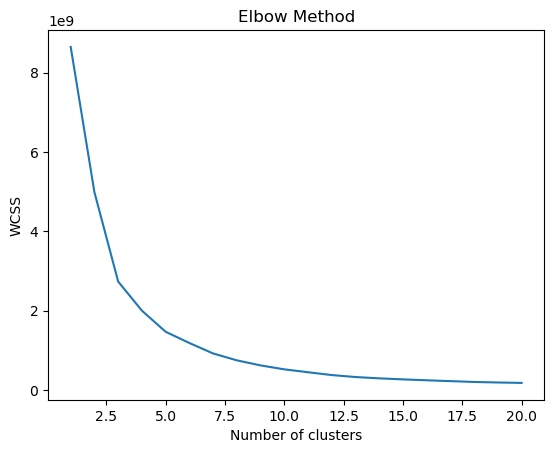

In [35]:
plt.plot(range(1,21), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


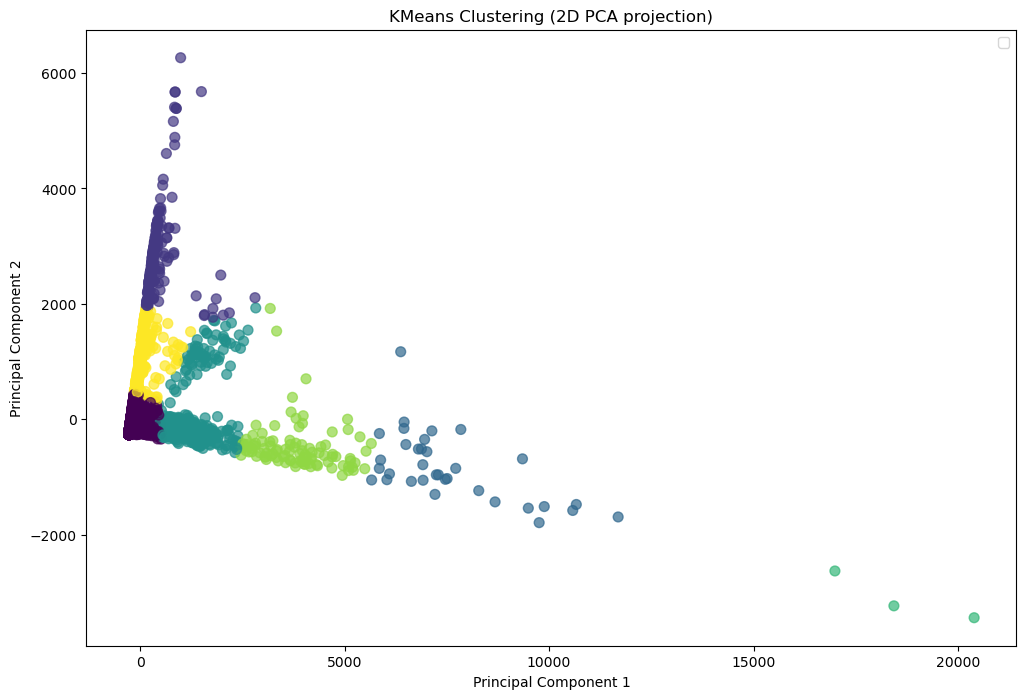

In [42]:
# Plot clusters
plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
#plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("KMeans Clustering (2D PCA projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()